

# Project: Medical appointments in Brazil no shows 
 ## _About 100 000 no show records from Kaggle source_

!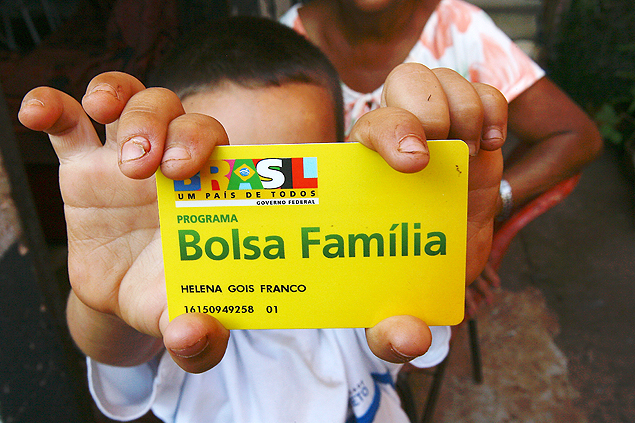


## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Set-up">Initial Set-up</a></li>   
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I will examine a dataset containing more than 100 000 no show to medical appointments in Brazil records . The dataset has been issued by Kaggle,a web site that organises data science contests.

I will identify  factors that can influence no show frequency (dependant variable):
    > I will first examine how Age, Gender, Location (called Neighbourhood in the data set) influence no show frequency
    > then influence of being enrolled in the Brazilian welfare program "Bolsa" : are people who enrolled in Bolsa more frequently not there for their medical appointment
    > I will then review timespan between appointment scheduling and appointment and its distribution




<a id='set-up'></a>
## Initial set-up
> In this section, I wil import tools necessary for the project :

In [1]:
%matplotlib inline
%config InlineBackend.figure_format=('retina')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import iqr





<a id='wrangling'></a>
## Data wrangling

> **Loading and first enquiry** :I first load data and look at general shape of data :
    - What is the size of data frame ?
    - Are there missing information ?
    - What are data types ? do I need to change data so that file is easier to analyse
    - Do errant data show ?


In [2]:
## Load data and check data size
noshow_df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
print("Dataframe size :",noshow_df.shape)



Dataframe size : (110527, 14)


In [3]:
##data inspection : columns titles
print("Title and content of first 5 rows :")
print(noshow_df.head())



Title and content of first 5 rows :
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1 

In [4]:

##should number of non null value be the number of lines in noshow_df, 
##there will be no necessary cleaning for missing data.
print("information about data :")
print(noshow_df.info())



information about data :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None


_I notice that there are no records with missing information (110527 non-null rows in each column, 110527 being the number of raws in noshow_df)_

In [5]:
##data inspection : file description ; 
print("file description")
print(noshow_df.describe())


file description
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000     

_Here, I notice that there are errant values in column 'age'. 
I intend to work on a dataframe where max age (115) and minimum age(-1) will be removed from dataframe._
Additionnaly, I will identify and remove any other outliers values and remove them.

In [6]:
## identify outlier values

print("Q1=",np.percentile(noshow_df['Age'],25),"Q3 =",np.percentile(noshow_df['Age'],75),"IQR=",iqr(noshow_df['Age']))
print("Outlier are ages above", np.percentile(noshow_df['Age'],75)+1.5*iqr(noshow_df['Age']),"years or under",np.percentile(noshow_df['Age'],25)-1.5*iqr(noshow_df['Age']),"years")

Q1= 18.0 Q3 = 55.0 IQR= 37.0
Outlier are ages above 110.5 years or under -37.5 years


 _I will remove negative value (-1) as well as ages above 111 years_

In [7]:
##data inspection : data type 
print("data type")
print(noshow_df.dtypes)


data type
PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object


## Data cleaning


>_When observing data, I noticed that :_

> I think not easy to deal with **'No-show' data, as an object**, I would like to replace Yes by 1 (there was a no-show) and No by 0 (patient was there for appointment)

> Information about **age** has to be cleaned : I intend to drop records lower than 0 and higher than 111 years.

> I think data types have to be modified :
**PatientId** type from float64 to **string**;
**ScheduledDay and AppointmentDay** type from object to **date formats**;





    

### Replace Yes and No by 1 and 0 in No-show column

In [8]:
##First check number or yes and no in the column No-show
print("BEFORE----------------------------------------------------------")
print(noshow_df.groupby(['No-show'])['Age'].count())
##Then replace No by 0 and Yes by 1
noshow_df['No-show'] = noshow_df['No-show'].apply(lambda x: 0 if x=='No' else 1)
##Eventually, check that result is consistant with former content
print("AFTER-----------------------------------------------------------")
print(noshow_df.groupby(['No-show'])['Age'].count())



BEFORE----------------------------------------------------------
No-show
No     88208
Yes    22319
Name: Age, dtype: int64
AFTER-----------------------------------------------------------
No-show
0    88208
1    22319
Name: Age, dtype: int64


### Remove records where age is either negative or higher than 111 years


In [9]:
##drop values lower than 0 or higher than 111 years
noshow_df.drop(noshow_df.index[noshow_df['Age'] < 0], inplace = True)
noshow_df.drop(noshow_df.index[noshow_df['Age'] >111], inplace = True)


In [10]:
##When examining split by Neighbourhoud, I notice that a Region contains 2 records only, both in no show and I want \
##to remove those 2 records
TRINDADE=noshow_df[noshow_df['Neighbourhood'].str.contains('ILHAS OC|TRINIDADE|PARQUE INDUSTRIAL', na=False)]
print(TRINDADE)
noshow_df.drop(noshow_df.index[noshow_df['Neighbourhood'].str.contains('ILHAS OC|TRINIDADE|PARQUE INDUSTRIAL', na=False)],inplace=True)


          PatientId  AppointmentID Gender          ScheduledDay  \
48754  5.349869e+11        5583947      F  2016-04-14T12:25:43Z   
48765  7.256430e+12        5583948      F  2016-04-14T12:26:13Z   
75199  8.255992e+12        5663947      F  2016-05-05T10:48:59Z   

             AppointmentDay  Age                Neighbourhood  Scholarship  \
48754  2016-05-13T00:00:00Z   51  ILHAS OCEÂNICAS DE TRINDADE            0   
48765  2016-05-13T00:00:00Z   58  ILHAS OCEÂNICAS DE TRINDADE            0   
75199  2016-05-05T00:00:00Z   17            PARQUE INDUSTRIAL            0   

       Hipertension  Diabetes  Alcoholism  Handcap  SMS_received  No-show  
48754             0         0           0        0             0        1  
48765             0         0           0        0             0        1  
75199             0         0           0        0             0        0  


In [11]:
##Check number of deleted lines
##check new statistical values for the dataframe
print(noshow_df['Age'].describe())

count    110518.000000
mean         37.085561
std          23.104717
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64


9 rows have been deleted (number of lines decreased by 9)

### Change data type

In [12]:
##**PatientId** type from float64 to **string**;
##**ScheduledDay and AppointmentDay** type from object to **date formats**;

noshow_df['PatientIdobj']=noshow_df['PatientId'].astype('str')
noshow_df['AppointmentIDobj']=noshow_df['AppointmentID'].astype('str')
noshow_df['ScheduledDay'] = noshow_df['ScheduledDay'].str[:10]
noshow_df['AppointmentDay']=noshow_df['AppointmentDay'].str[:10]

from datetime import datetime as dt
date_format = '%Y-%m-%d'
def changedate(value):
        return dt.strptime(value, date_format)

noshow_df['Scheduled']=noshow_df['ScheduledDay'].apply(changedate)
noshow_df['Appoint']=noshow_df['AppointmentDay'].apply(changedate)

##Add column'Scheduling', being number of days between scheduledday and appointment day
noshow_df['Scheduling']=noshow_df['Appoint']-noshow_df['Scheduled']

##Add column 'TimeSpan' being the number of days between scheduling and appointment
def numberdaysint(Scheduling):
        return pd.to_timedelta(Scheduling).days
noshow_df['TimeSpan']=noshow_df['Scheduling'].apply(numberdaysint)


In [13]:
print("Check that new records have  types needed : ")
print(noshow_df.dtypes)


Check that new records have  types needed : 
PatientId                   float64
AppointmentID                 int64
Gender                       object
ScheduledDay                 object
AppointmentDay               object
Age                           int64
Neighbourhood                object
Scholarship                   int64
Hipertension                  int64
Diabetes                      int64
Alcoholism                    int64
Handcap                       int64
SMS_received                  int64
No-show                       int64
PatientIdobj                 object
AppointmentIDobj             object
Scheduled            datetime64[ns]
Appoint              datetime64[ns]
Scheduling          timedelta64[ns]
TimeSpan                      int64
dtype: object


<a id='eda'></a>
## Exploratory Data Analysis

> I will now try to define whether **Age, Gender, Region** seem to have an influence on no shows
> Then I will check **efficiency of health program** : do people enrolled in the program respect more apointments ?
> I will also check whether **scheduling appointment** in advance

### First exploratory analysis: Age, Gender, Region

_Analysis of no-show frequency per age and gender_

In [14]:
##split of sample per Gender (ALL = Male + Female, WOMEN and MEN)
ALL= noshow_df
WOMEN = noshow_df[noshow_df.Gender == "F"]
MEN = noshow_df[noshow_df.Gender == "M"]

print("size of women records", WOMEN.shape)
print("size of men records", MEN.shape)


size of women records (71831, 20)
size of men records (38687, 20)


In [15]:
##define a function that allows to calculate Frequency of no-show per age on a given dataframe
def dessin(df) :
    MAT1=df.groupby(['Age'],as_index=False).count()
    MAT2=df.groupby(['Age'],as_index=False).sum()
    A=MAT1.merge(MAT2, left_on='Age', right_on='Age')
    A['FreqAge']=A['No-show_y']/A['AppointmentID_x']
    return A

##perform function for each Gender selection and review major statistical indicators
ALL=dessin(ALL)
WOMEN=dessin(WOMEN)
MEN=dessin(MEN)
print("Dataframe for both genders",ALL['FreqAge'].describe())
print("Dataframe for men",MEN['FreqAge'].describe())
print("Dataframe for women",WOMEN['FreqAge'].describe())


Dataframe for both genders count    102.000000
mean       0.188722
std        0.053670
min        0.000000
25%        0.161550
50%        0.185880
75%        0.227088
max        0.282648
Name: FreqAge, dtype: float64
Dataframe for men count    100.000000
mean       0.191285
std        0.067318
min        0.000000
25%        0.151065
50%        0.193142
75%        0.231949
max        0.500000
Name: FreqAge, dtype: float64
Dataframe for women count    102.000000
mean       0.189717
std        0.055083
min        0.000000
25%        0.157087
50%        0.196045
75%        0.225552
max        0.297153
Name: FreqAge, dtype: float64


No show per age : whole population


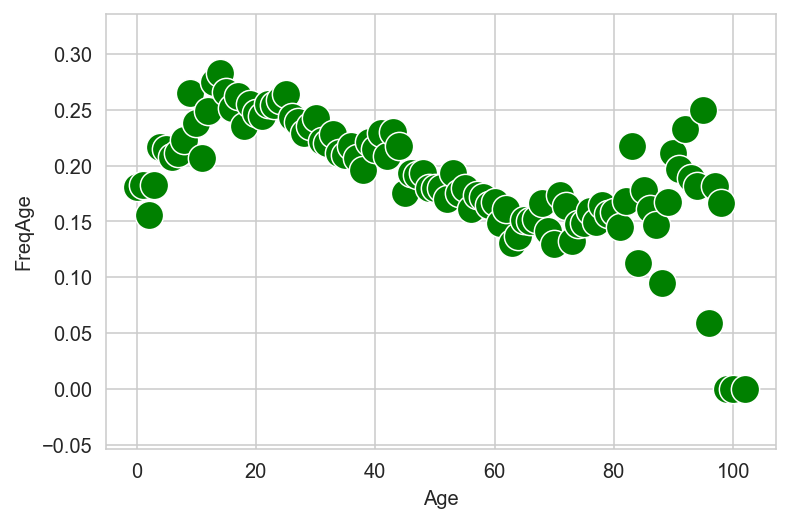

In [16]:

##draw subsequent graph
def graph(df,color,s):
    sb.set_style('whitegrid')
    sb.scatterplot(x=df['Age'], y=df['FreqAge'],color=color,s=s)

    fig = plt.gcf()
    fig.set_size_inches( 6, 4)
    return
print("No show per age : whole population")
graph(ALL,"green",200);





No show per age and per gender


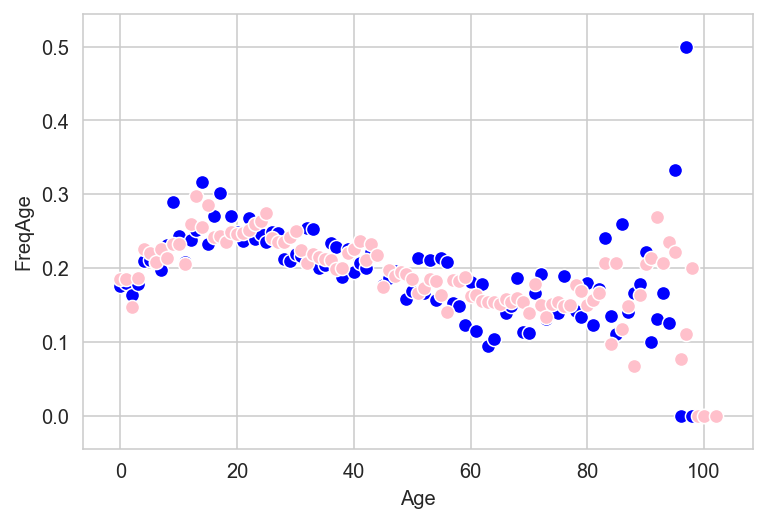

In [17]:
print("No show per age and per gender")
graph(MEN,"blue",50)
graph(WOMEN,"pink",50)

_We can see that no-show frequency is increasing during teenage and then decreases with age and that it is not significantly higher for men than for women_

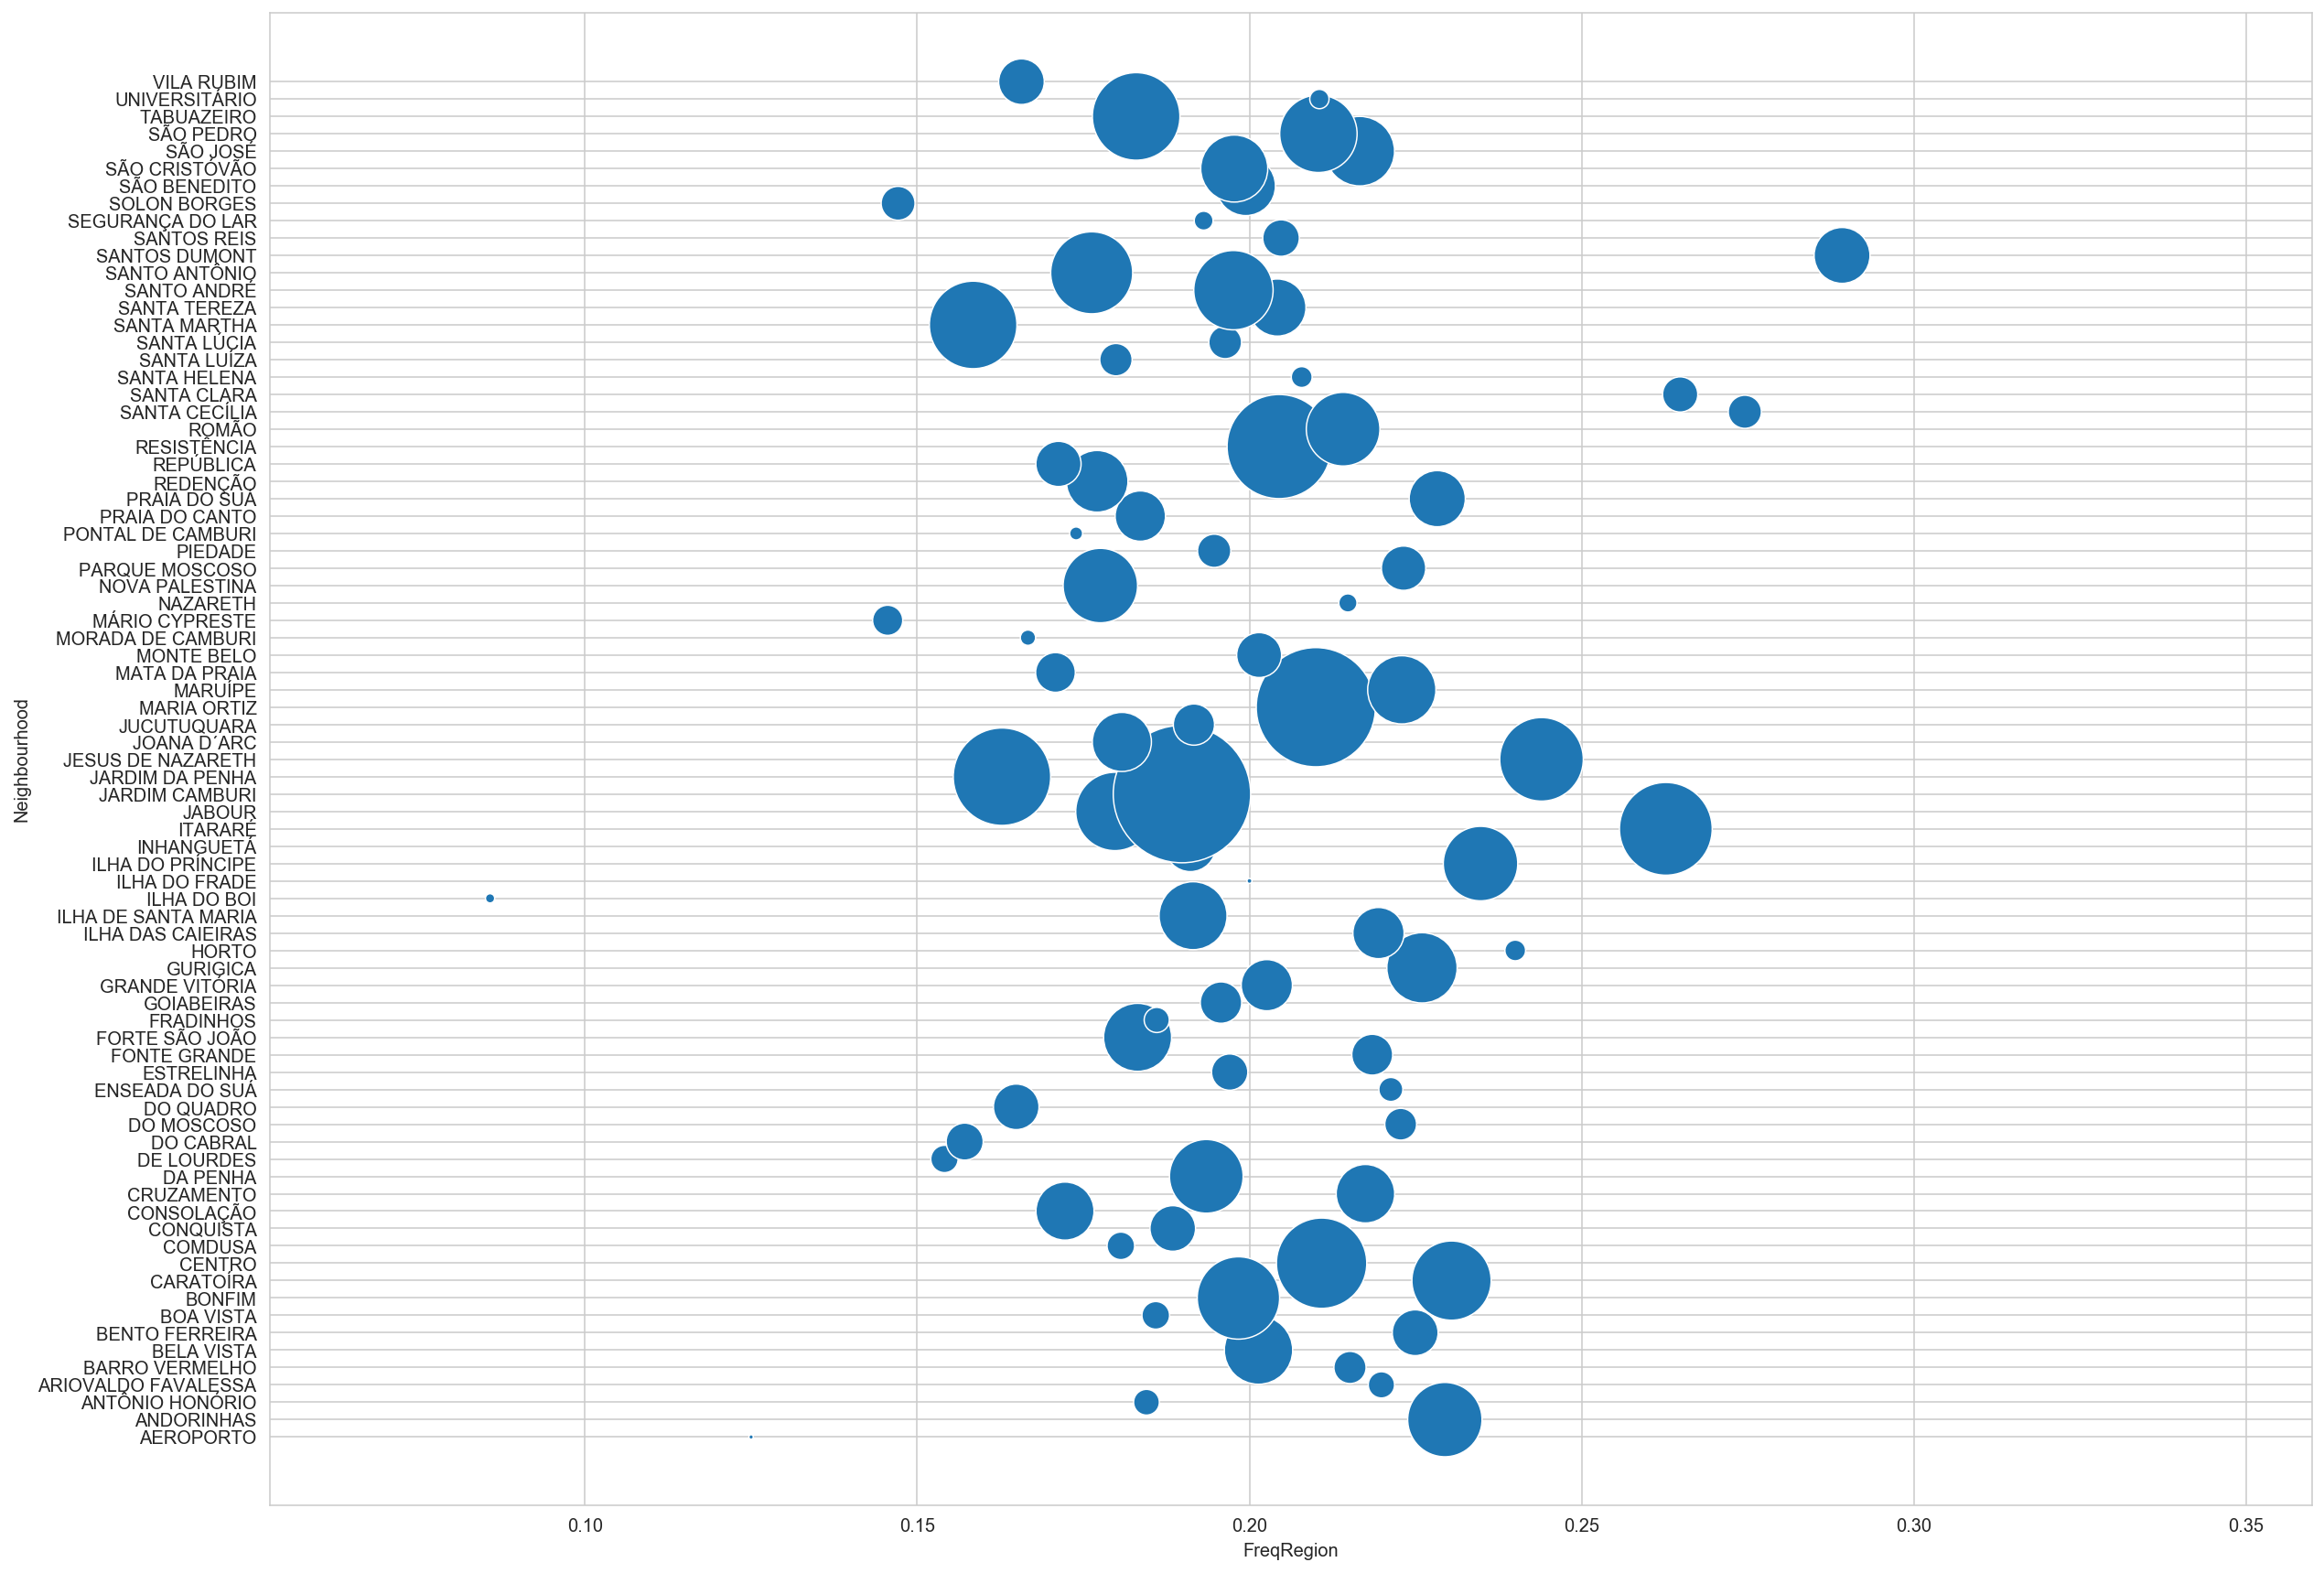

In [18]:
### Number of no-show per region

noshow_reg1=noshow_df.groupby(['Neighbourhood'],as_index=False).count()

noshow_reg2=noshow_df.groupby(['Neighbourhood'],as_index=False).sum()

R=noshow_reg1.merge(noshow_reg2, left_on='Neighbourhood', right_on='Neighbourhood')
R['FreqRegion']=R['No-show_y']/R['AppointmentID_x']


##sb.catplot(y="Neighbourhood", x="FreqRegion", height=10,kind="swarm", data=R);
sb.scatterplot(R['FreqRegion'],R['Neighbourhood'],s=R['AppointmentID_x']/R['AppointmentID_x'].std()*1000)
fig = plt.gcf()
fig.set_size_inches( 20, 15)


_With dataset provided, we cannot conclude yet about link between region and no-show frequency_ Additional dataset with information about public transport availability, average revenue per region and location of health centers would be necessary at that stage_

What is the impact of enrollment to Bolsa program ?

In [19]:
##No-show frequency for Bolsa program participants
noshow_sc1=noshow_df.groupby(['Scholarship'],as_index=False).count()
noshow_sc2=noshow_df.groupby(['Scholarship'],as_index=False).sum()
S=noshow_sc1.merge(noshow_sc2, left_on='Scholarship', right_on='Scholarship')

##Compute frequency of No-show per appointment
S['FreqNoshow']=S['No-show_y']/S['AppointmentID_x']

##Clean index and column names
S.rename(columns={'No-show_y': 'No-show number', 'AppointmentID_x': 'Appointment number', 'FreqNoshow': 'No show frequency'}, inplace=True)
S.rename(index = {0: 'Not enrolled in Bolsa', 1: 'Bolsa participant'}, inplace = True)

##print average no-show per population enrolled, per population not enrolled
print(S.loc[:,['No-show number','Appointment number','No show frequency']])

                       No-show number  Appointment number  No show frequency
Not enrolled in Bolsa           19736               99657           0.198039
Bolsa participant                2578               10861           0.237363


_We can see that  no-show frequency seems higher for Bolsa participants_
>_This information has to be completed by information about age and gender of Bolsa participants, compared to rest of population. Indeed, as Bolsa program is meant to help disadvantaged people to get access to health, it is likely that population enrolled has from the beginning more difficulties to attend appointments_


### Comparison of Bolsa participants and non participants characteristics

No show per age and per participation to Bolsa program


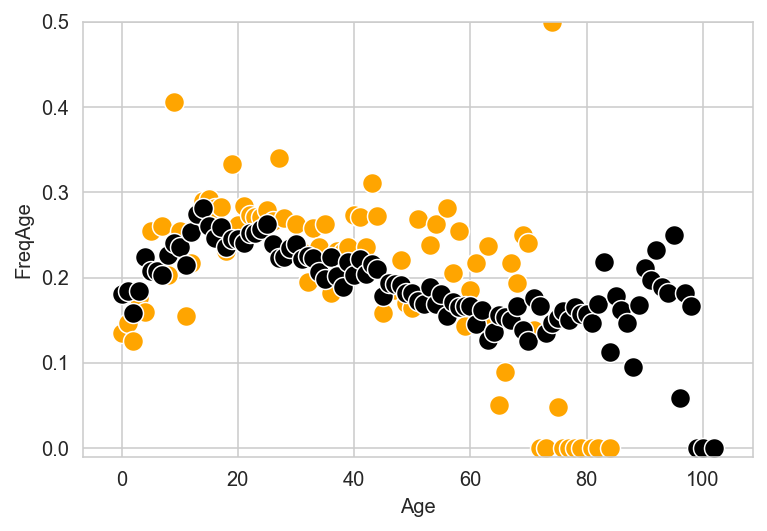

In [20]:

##create 2 new dataframes : Bolsa for participants to Bolsa, noBolsa for others
Bolsa = noshow_df[noshow_df.Scholarship == 1]
NoBolsa = noshow_df[noshow_df.Scholarship != 1]
plt.ylim(-0.01, 0.5)

BOLSA=dessin(Bolsa)
NOBOLSA=dessin(NoBolsa)

print("No show per age and per participation to Bolsa program")
graph(BOLSA,"orange",100)
graph(NOBOLSA,"black",100)


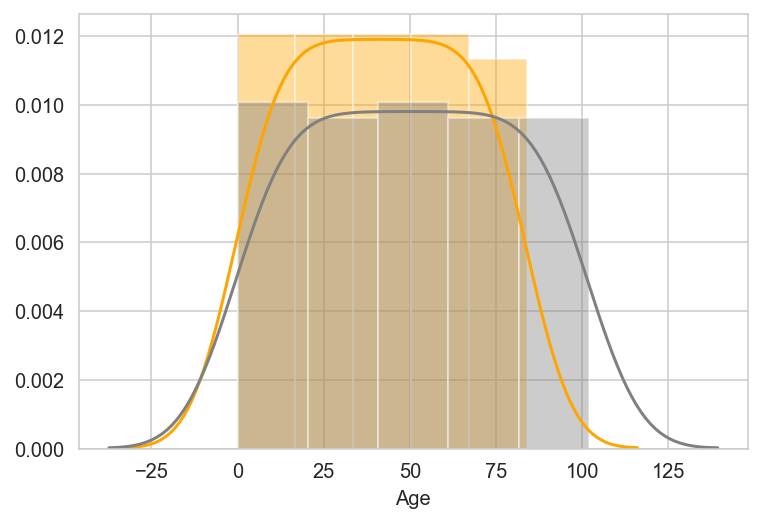

In [21]:
##create 2 new dataframes : Bolsa for participants to Bolsa, noBolsa for others
sb.distplot(BOLSA['Age'], kde=True,color="orange")
sb.distplot(NOBOLSA['Age'], kde=True,color="grey")




People enrolled in Bolsa seems younger than rest of the sample.

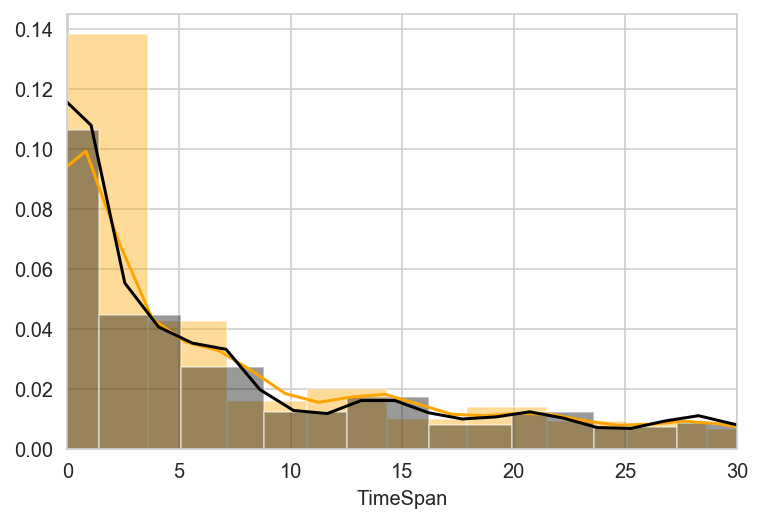

In [22]:
plt.xlim(-0.01, 30)
sb.distplot(Bolsa['TimeSpan'], kde=True,color="orange")
sb.distplot(NoBolsa['TimeSpan'], kde=True,color="black")



<a id='conclusions'></a>
## Conclusions
Age definitely influence frequency of no-shows, gender does not seem to influence it significantly.
Bolsa program participants are in average more prone to no-show, but their average young age can explain this.
Also, "urgent appointments" where scheduling is very near from appointment is more frequent for Bolsa program participants.

In order to complete this analysis, information about average revenue, and distance between health center and participants address would be necessary.
